In [4]:
library("tidyverse")
library("ggrepel")
library("ggplot2")
install.packages("ggthemes")
library("ggthemes")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Assignment #4

## Due on October 22nd, 2020

Uncomment and run the following cell to set up the marathon data. 👇

In [5]:
 df_marathon = read.csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

 df_filtered = df_marathon %>% 
     filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan'))

 df_country = df_marathon %>%
     filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan')) %>%
     group_by(country, MF) %>%
     summarize(race.time = mean(race.time), year = mean(year))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



This cell represents the progress we made on the marathon visualization in class. Add theme adjustments to create a chart with your own style. 

**This is a great resource for theme elements that you can adjust:** https://ggplot2.tidyverse.org/reference/theme.html

Here is a nice gallery of themes that you might base your work on: https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/

At minimum adjust the following chart attributes:
- `plot.background` and `panel.background`
- Use `labs` to improve the x and y-axis labels
- Add a title and subtitle with the `labs` or the `ggtitle` function ([hint](https://ggplot2.tidyverse.org/reference/labs.html))

If you want your title to line up with the left side of you "plot" instead of your "panel" use this inside your `theme` function:
```R
plot.title.position = "plot"
```

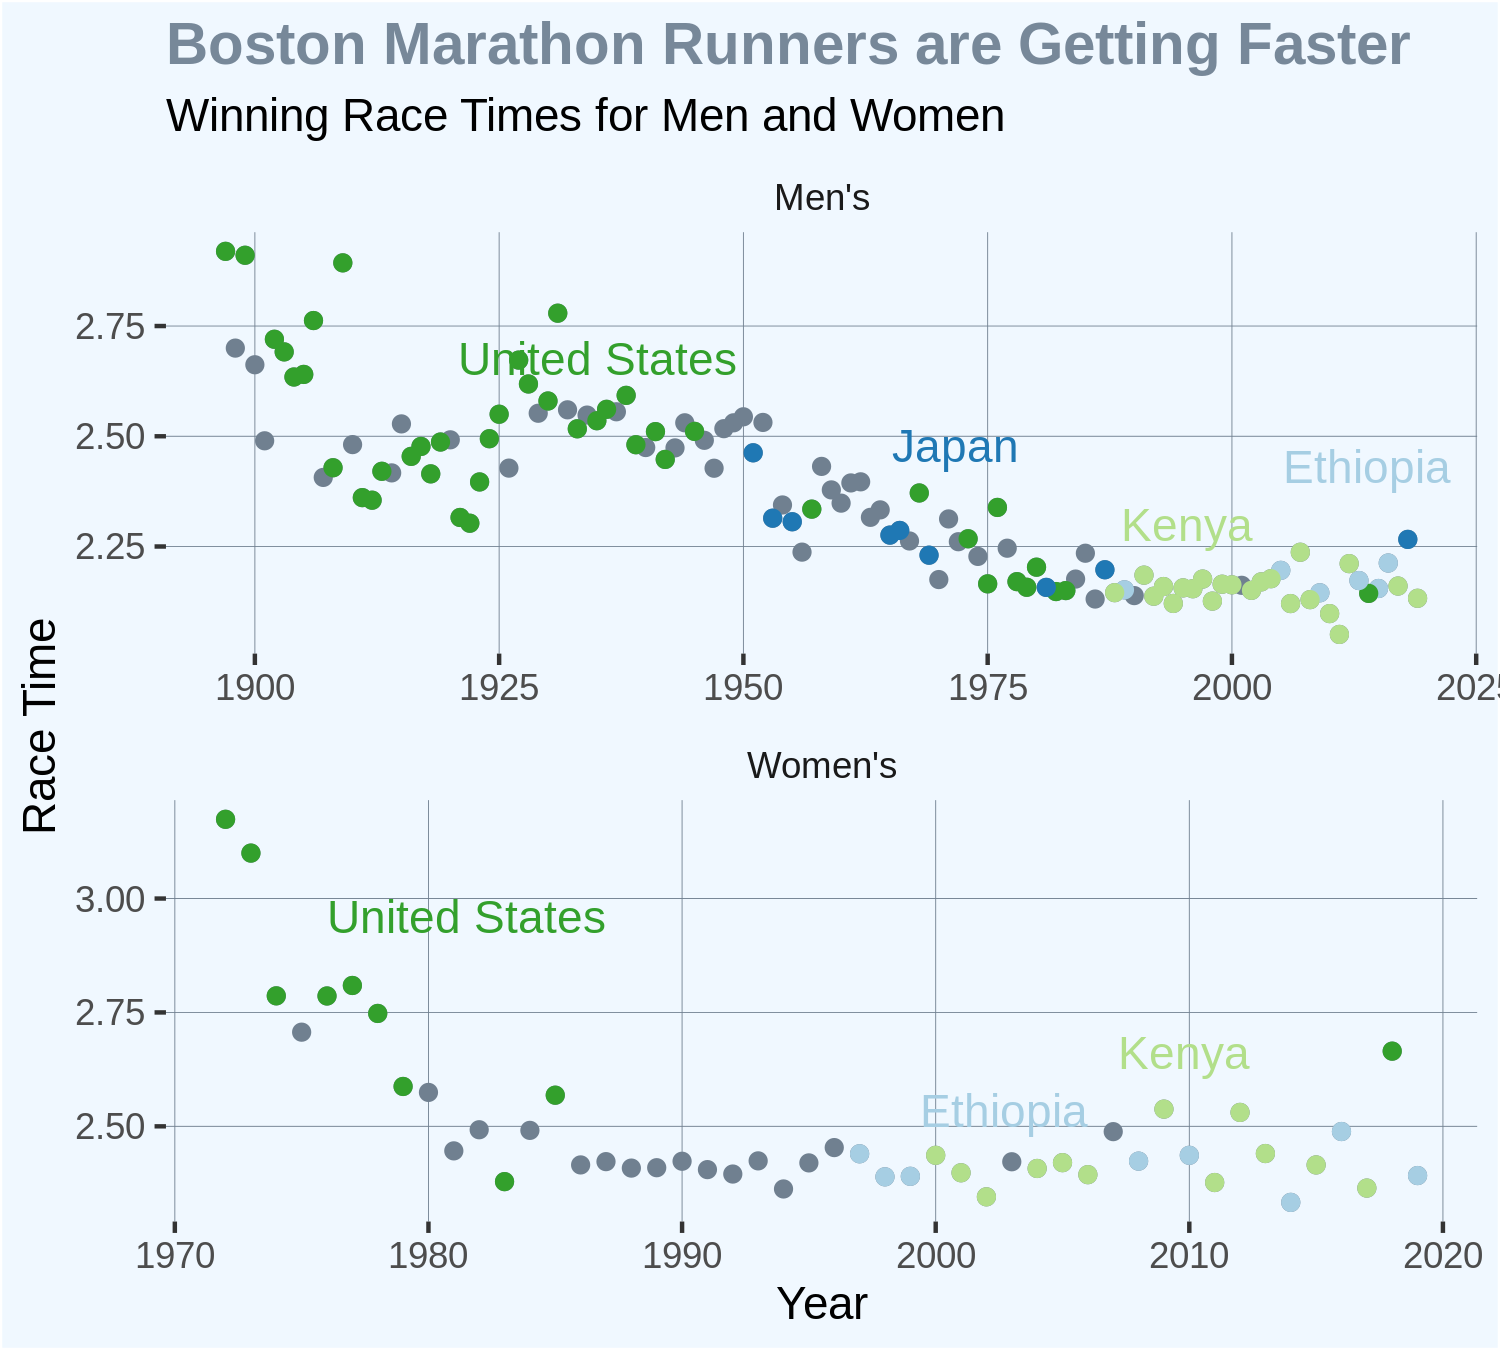

In [67]:
options(repr.plot.width = 5, repr.plot.height = 4.5, repr.plot.res = 300)

p = ggplot(df_marathon, aes(x = year, y = race.time))

p = p + labs(y = "Race Time", x = "Year")

p = p + geom_point(color = 'slategray')

p = p + geom_point(data = df_filtered, aes(color = country))

p = p + geom_text_repel(
    segment.color = 'transparent',
    nudge_y = 0.2,
    data = df_country, 
    aes(label = country, color = country)
)

p = p + labs(title = "Boston Marathon Runners are Getting Faster",
              subtitle = "Winning Race Times for Men and Women"
              )

p = p + scale_color_brewer(palette = "Paired")

p = p + facet_wrap(~MF, scales = "free", ncol = 1)

p = p + theme(
  panel.background = element_rect(fill = "aliceblue",
                                size = 0.5, linetype = "solid"),
  panel.border = element_blank(),
          panel.grid.major = element_line(size = 0.1, linetype = 'solid',
                                colour = "slategray"), 
          panel.grid.minor = element_blank(),
          axis.line = element_blank())

p = p + theme(strip.background =element_rect(fill="aliceblue"))

p = p + theme(legend.position = "none")

p = p + theme(plot.background = element_rect(fill = "aliceblue"))
              
p = p + theme(plot.title = element_text(color="lightslategray", size=14, face="bold"))

p

Here is my solution...

<img src="./04_example.png" style="width: 800px;" />